# Lesson 1 Anime HandsOn
Analyze data about Anime

### Import Packages and Data

In [48]:
import pandas as pd

# For Single Sample t-Test
import numpy as np
from scipy.stats import norm

# For Independent t_test
from scipy.stats import ttest_ind

# Also for dependent t-Test, Independent Chi-Square
from scipy import stats

# For Correlation 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime = pd.read_csv('C:/Users/chris/Desktop/data/DS105/Lesson1/anime.csv')

In [9]:
# Create working dataframe
anime1 = anime

### View Data

In [10]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [11]:
anime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   title_english    3438 non-null   object 
 3   title_japanese   6663 non-null   object 
 4   title_synonyms   4481 non-null   object 
 5   image_url        6666 non-null   object 
 6   type             6668 non-null   object 
 7   source           6668 non-null   object 
 8   episodes         6668 non-null   int64  
 9   status           6668 non-null   object 
 10  airing           6668 non-null   bool   
 11  aired_string     6668 non-null   object 
 12  aired            6668 non-null   object 
 13  duration         6668 non-null   object 
 14  rating           6586 non-null   object 
 15  score            6668 non-null   float64
 16  scored_by        6668 non-null   int64  
 17  rank          

In [12]:
anime1.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


# Part 1 : Is a Rating Score of 6.2 Different from the Mean in this Dataset?

### This is comparing a sample to the mean so this should be compared using a single sample t-Test

### Use the variable "score"


<AxesSubplot: >

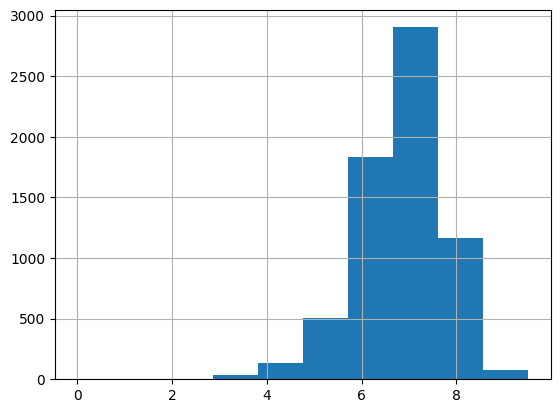

In [13]:
# Check distribution of data
anime1['score'].hist()
# It appears to be distributed equal enough for the analysis.

In [14]:
# Compute single sample t-Test
stats.ttest_1samp(anime1['score'], 6.2)

TtestResult(statistic=57.14153988539698, pvalue=0.0, df=6667)

In [16]:
anime1['score'].mean()

6.848998200359928

### Based on the single sample t-Test the rating score of 6.2 is different from the mean. The p value of 0.0 presumed 0.000 is less than .05 indicated the statistic is significant, rejecting the null hypothesis. 

### Also, the mean as noted above is 6.85 which is different from the sample of 6.2. 

# Part 2:
# Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?

### Use variables status and popularity.

In [21]:
anime1[['status','popularity']]

,status,popularity
0,Finished Airing,231
1,Finished Airing,366
2,Finished Airing,1173
3,Finished Airing,916
4,Finished Airing,426
5,Finished Airing,1630
6,Finished Airing,2490
7,Finished Airing,332
8,Finished Airing,988
9,Finished Airing,69


In [27]:
# Find the possible values of status
anime1.status.unique()

array(['Finished Airing', 'Currently Airing'], dtype=object)

## Check for Normality

<AxesSubplot: >

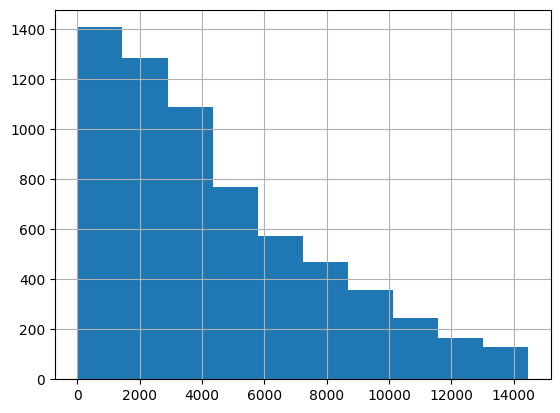

In [40]:
# Check the normality for "Finished Airing" and "Currently Airing"
anime1.popularity[anime1.status == 'Finished Airing'].hist()

### It appears there is a negative 

<AxesSubplot: >

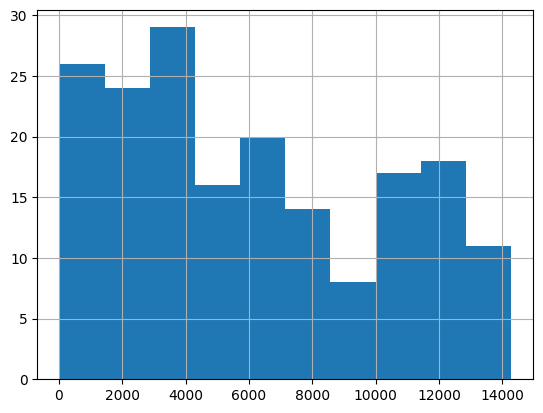

In [41]:
anime1.popularity[anime1.status == 'Currently Airing'].hist()

In [49]:
# Run Independent t-Test
ttest_ind(anime1.popularity[anime1.status == 'Currently Airing'],anime1.popularity[anime1.status == 'Finished Airing'])

Ttest_indResult(statistic=6.489071311277514, pvalue=9.256789141747446e-11)

###  The p value for the Independent t-Test is less than .05 indicating the there is statistical significane and the staus does have an impact on the popularity. 

In [53]:
# Compare the means of popularity by status. 
stats_info = anime1.groupby('status')['popularity'].describe()

In [54]:
stats_info

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Currently Airing,183.0,6108.131148,4116.007457,35.0,2667.5,5491.0,10006.5,14263.0
Finished Airing,6485.0,4433.558057,3421.931862,1.0,1671.0,3595.0,6556.0,14468.0


### One can note from the calulations above that mean of popularity is much higher for Currently Airing shows. It it worth noting the sample size for the Finished Airing is much larger, this is expected because all the anime shows in history not airing is likely a higher number than just the current shows. 

# Part 3:
# Does the Source of the Anime Influence the Type of Anime?

### Use the column "source" and "type"

In [59]:
anime1.source.describe()

count      6668
unique       15
top       Manga
freq       2493
Name: source, dtype: object

In [56]:
anime1.source.unique()

array(['Manga', 'Original', 'Light novel', '4-koma manga', 'Novel',
       'Visual novel', 'Other', 'Game', 'Picture book', 'Card game',
       'Web manga', 'Book', 'Music', 'Radio', 'Digital manga'],
      dtype=object)

In [57]:
anime1.source.value_counts()

source
Manga            2493
Original         1789
Light novel       512
Visual novel      482
Game              424
Novel             282
4-koma manga      194
Other             170
Web manga         111
Music              55
Picture book       53
Card game          46
Book               45
Digital manga       7
Radio               5
Name: count, dtype: int64

### Recode the source values into Manga, Book, Game and Listening
.describe() indicate there are 15 levels to recode

A Manga is a style of print like a comic book but is different and considered its own style of publishing. Sometimes used as a blanket term that includes comic books. 

Manga: Manga, 4-loma manga, Web Manga, Digital manga, Original

Book: Light novel, Visual novel, Novel, Picture book,Book

Game: Game, Card game, Other

Listening: Music, Radio

In [95]:
# Create working Dataframe to test code
testRecode= anime1

In [103]:
# Recode using Pandas Map and Pandas assign example code: df.assign(newVarName=df.column.map(mapping))
# Create the map
RecodeMap = {'Manga':'Manga', '4-loma manga':'Manga', 'Web Manga':'Manga', 'Digital manga':'Manga', 'Original':'Manga','Light novel':'Book', 'Visual novel':'Book', 'Novel':'Book', 'Picture book':'Book','Book':'Book', 'Game':'Game', 'Card game':'Game', 'Other':'Game', 'Music':'Listening', 'Radio':'Listening'}

In [107]:
# Create a recoded df the recoded source column is called sourceCategory
# .assign assignes the new column to the df and .map uses the RecodeMap to create the new column
recoded = testRecode.assign(sourceCategory= testRecode.source.map(RecodeMap))

In [109]:
# Check the new recoded values for the anime source
recoded.sourceCategory.value_counts()

sourceCategory
Manga        4289
Book         1374
Game          640
Listening      60
Name: count, dtype: int64

In [112]:
# Review the types of anime
recoded.type.value_counts()

type
TV         2980
OVA        1345
Special     929
Movie       908
ONA         408
Music        98
Name: count, dtype: int64

### For this analysis there are two categorical variables. The null hypothesis is that there is no relationship between them. Create a crosstab/contingency table and check to see if the data meet the assumption of atleat 5 entries per category.

In [113]:
#ST representing Source and Type
STcrosstab = pd.crosstab(recoded['sourceCategory'], recoded['type'])

In [114]:
# Display Crosstab
STcrosstab

type,Movie,Music,ONA,OVA,Special,TV
sourceCategory,,,,,,
Book,163,2,62,389,174,584
Game,110,10,61,80,95,284
Listening,2,42,0,1,1,14
Manga,622,44,245,847,601,1930


Must use this data cautiously as the crosstab does not meet the assumption of atleast 5 entries per cell. 

In [115]:
# Compute the Chi-Square analysis
stats.chi2_contingency(STcrosstab)

Chi2ContingencyResult(statistic=1975.4635776210923, pvalue=0.0, dof=15, expected_freq=array([[1.93694484e+02, 2.11617162e+01, 7.94644036e+01, 2.84387553e+02,
        1.88080151e+02, 6.07211693e+02],
       [9.02215936e+01, 9.85698570e+00, 3.70139871e+01, 1.32465818e+02,
        8.76064749e+01, 2.82835141e+02],
       [8.45827440e+00, 9.24092409e-01, 3.47006129e+00, 1.24186704e+01,
        8.21310702e+00, 2.65157944e+01],
       [6.04625648e+02, 6.60572057e+01, 2.48051548e+02, 8.87727959e+02,
        5.87100267e+02, 1.89543737e+03]]))

The p value of 0.0 or 0.000 is less than .05 so the null hypothesis is rejected. There is some influence between the type of anime and the source of anime.

# Part 4:
# How do the Variables about Popularity / Ranking Relate to Each Other?
Use the following variables:

score<br>
scored_by<br>
rank<br>
popularity<br>
members<br>
favorites<br>

In [117]:
# Create and subset a df to work with for part 4 named anime4
anime4=anime1[['score','scored_by','rank','popularity','members','favorites']]

In [118]:
# Display the Data
anime4.head()

,score,scored_by,rank,popularity,members,favorites
0,7.63,139250,1274.0,231,283882,2809
1,7.89,91206,727.0,366,204003,2579
2,7.55,37129,1508.0,1173,70127,802
3,8.21,36501,307.0,916,93312,3344
4,8.67,107767,50.0,426,182765,2082


In [119]:
# Check data types
anime4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   score       6668 non-null   float64
 1   scored_by   6668 non-null   int64  
 2   rank        6312 non-null   float64
 3   popularity  6668 non-null   int64  
 4   members     6668 non-null   int64  
 5   favorites   6668 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 312.7 KB


<AxesSubplot: >

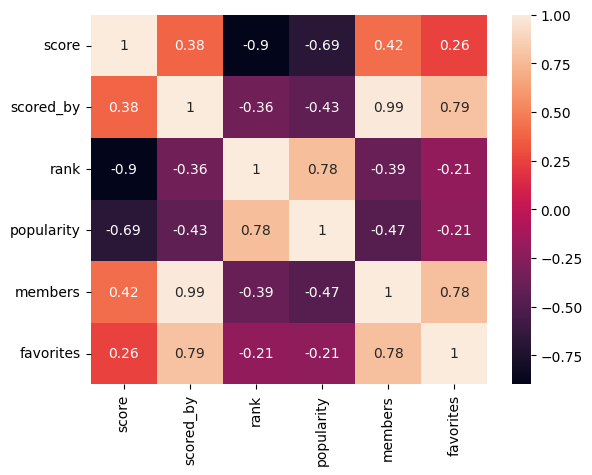

In [120]:
# Use sns to create a correlation matrix
sns.heatmap(anime4.corr(),annot = True)

C:\Python3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Python3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Python3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Python3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Python3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Python3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Python3\Lib\s

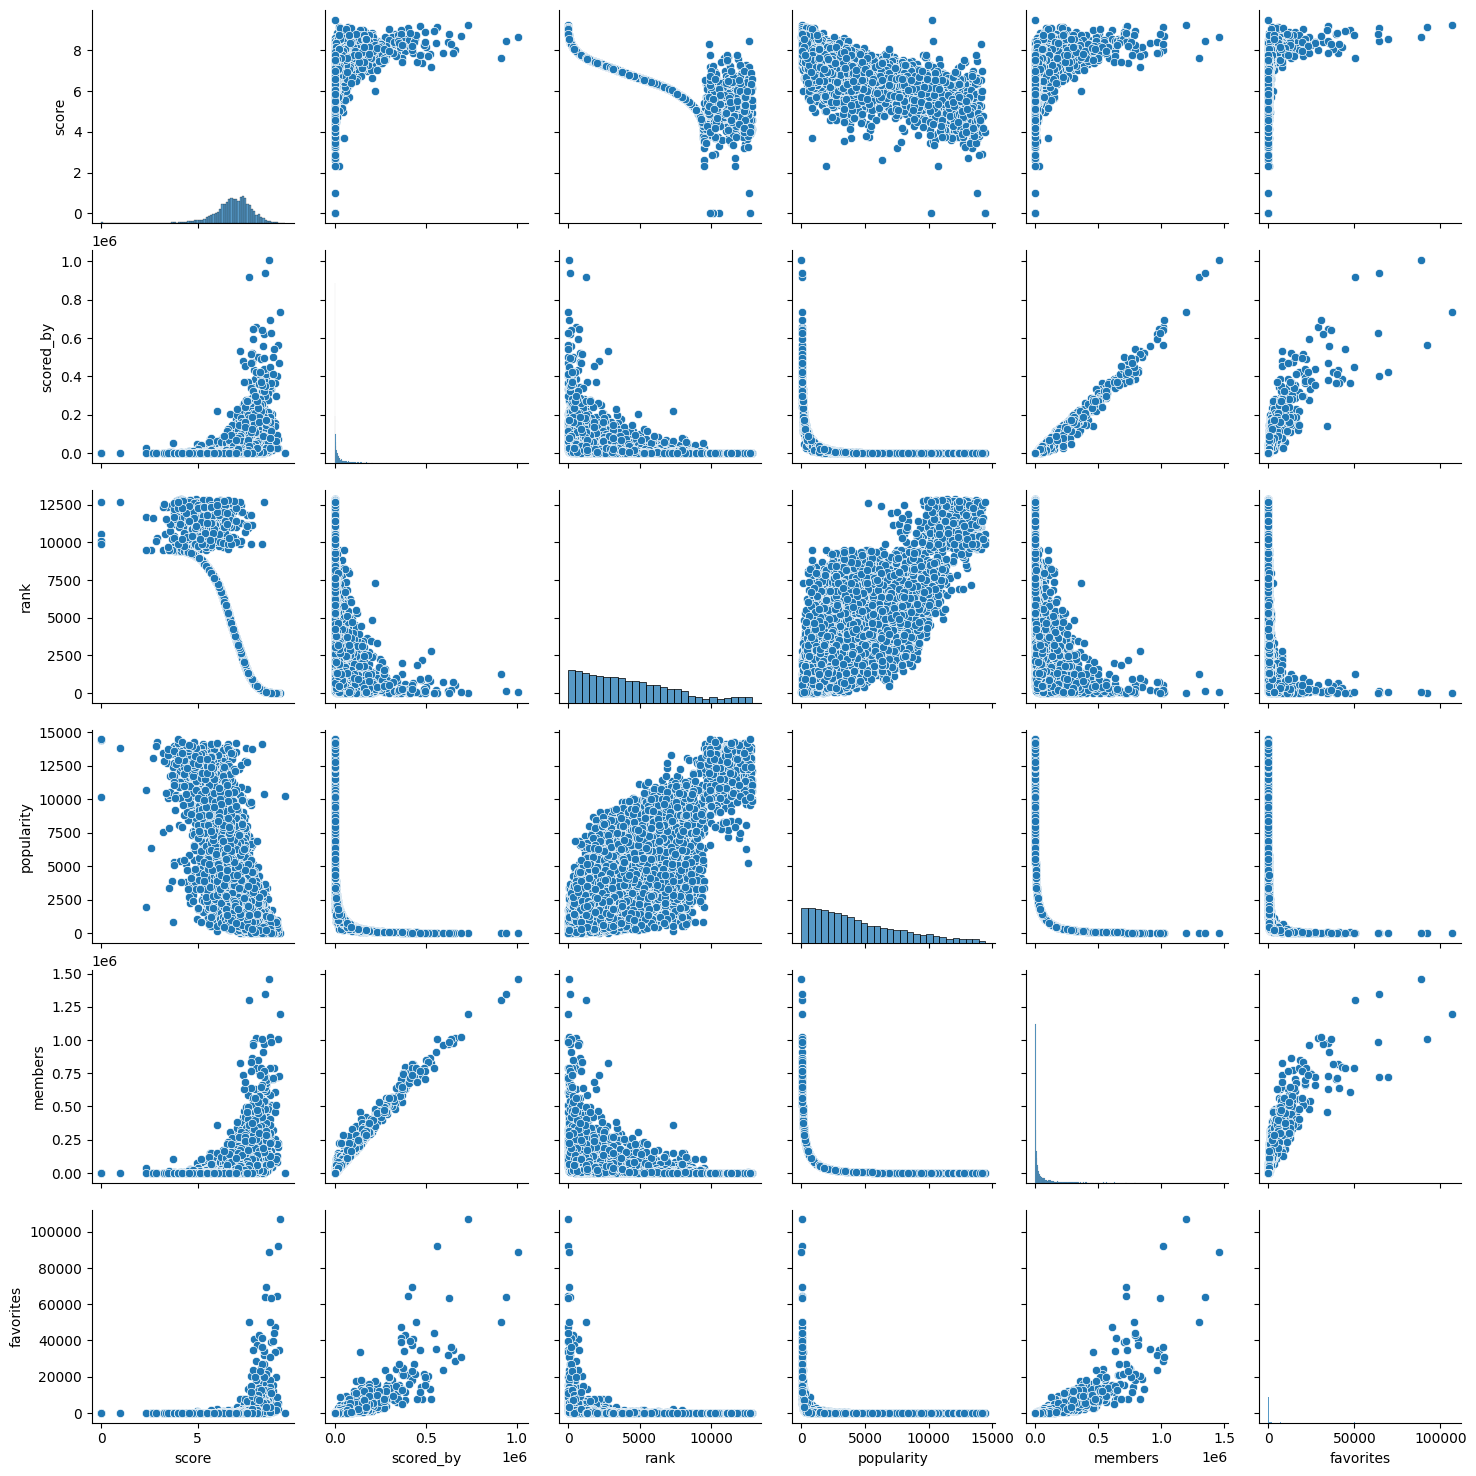

In [123]:
# This is a lot to look at, try something different to get started
sns.pairplot(anime4, diag_kind='hist', palette='Set1')

# Analysis
Analyzing the correlation of the data above from left to right, by variable: <br>

Score appears to have a very strong negative correlation with rank. As rank goes down, so does the score. Score also appears to have a fairly strong correlation with rank. <br>

Scored_by spears to have a strong positive correlation with both favorite and members. <br>

Rank appears to have a strong positive correlation with popularity and score. <br>

Popularity appears to have a strong correlation with rank and score. <br>

Favorites appear to have a strong correlation with members and scored_by. <br>

This leaves important questions I would want to answer if I am using this data to help a business make any decisions. For example, looking at scored_by and members have a .99 correlation. Which may be that all the scores were from members. So, before any marketing for a new customers, It would be important to know more about the demographics of the current members. 

